# Backtesting Investment Strategy 

- Purpose of projet is to examine daily Close prices of stocks from 2010-01-01 to 2020-03-31

 Method:

- Create active strategies that outperform a passive buy and hold strategy for the Dow Jones Index.

- BAC testing / Further testing 

- Visualize data & Returns 

In [152]:
#Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#Set style for seaborn 
plt.style.use("seaborn")

In [153]:
#read in data
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


- Date data type is object needs to be changed to DATETIME 

In [154]:
#Parse Date 
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [155]:
#Check date data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


 - Purpose of this project is to get data from 2010-01-01 to 2020-03-31 for CLOSE prices.

In [156]:
#Filter dates / Close prices / put into new frame 
df = data.loc["2010-01-01": "2020-03-31", "Close"].to_frame()

In [157]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


In [158]:
#Get statistical info for data
df.describe()

,Close
count,2577.000000
mean,17820.342520
std,5292.260933
min,9686.480469
25%,13034.490234
50%,17113.150391
75%,21892.429688
max,29551.419922


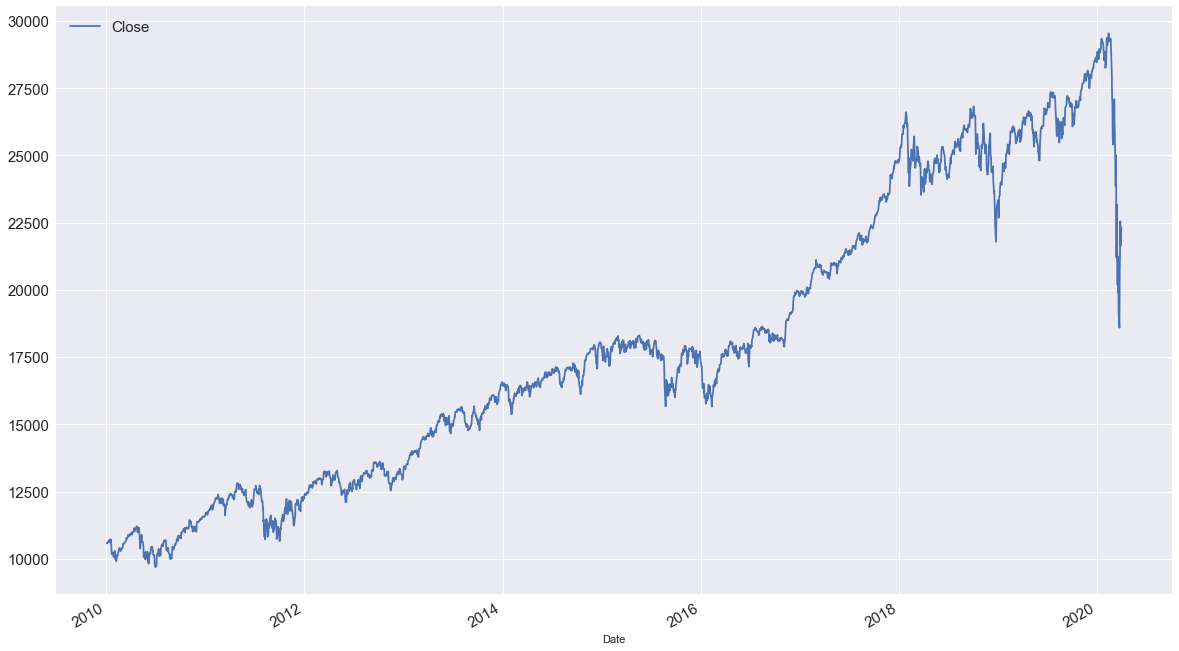

In [159]:
#Plot stats data into graph
df.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__Conclusion From Data__

- Bull market from 2010 to beginning of 2020(Jan/Feb)
- Bear market from 2020(Feb/Mar onwards)

Reasons for sudden change?
 - Covid-19 impact on economy 

In [160]:
#Find relative changes in returns / pct_change method
df["returns"] = df.pct_change()

In [161]:
df

,Close,returns
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [162]:
# Drop all rows with missing values
df.dropna(inplace = True)

In [163]:
df

,Close,returns
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


March 2020 sudden changes
- High volatility nature of the Stock Market
- Covid-19 impact on the market 

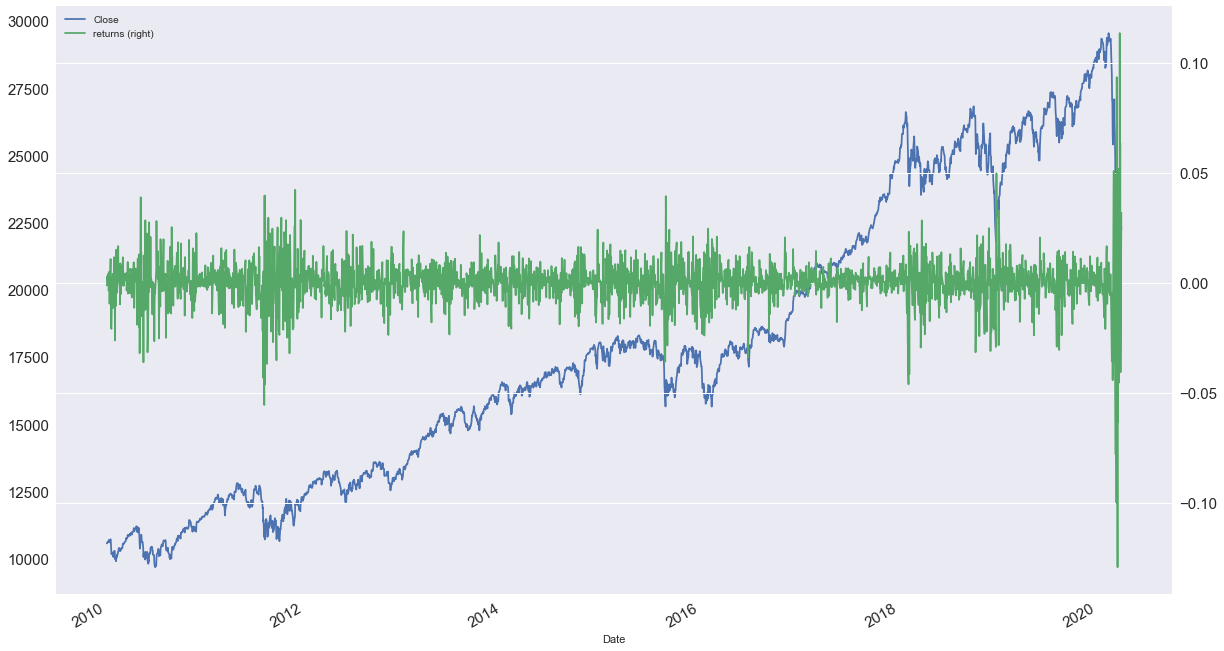

In [164]:
#Show data for Close prices and Returns
df.plot(figsize = (20,12), secondary_y = "returns", mark_right = True, fontsize = 15)
plt.show()

In [165]:
df.rename(columns = {"Close":"DJI_Close", "returns":"DJI_Return"}, inplace = True)

In [166]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


# Backtesting a simple Momentum Strategy 

__Positions: 

- +1: Investing in DJl(long position)
- -1: Short Selling DJl(short position)
-  0: No position(neutral)
 
__Strategy__:

- __Buy and Hold__(Basic Strategy - passive): Initially Investing into DJl and do nothing(Position +1 on any given day)

__Simple Momentum__(active strategy to be tested):
- __a)Investing(+1)__ into DJl tomorrow if today's returns were __positive__
- __b)Short Selling(-1)__ into DJl tomrrow if today's returns were __negative__

In [167]:
#Load in data 
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [168]:
df["Position"] = np.sign(df["DJI_Return"])

In [169]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [170]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [171]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [172]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [173]:
# add 1 to each and every return / calculate accummulate product 
df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_Ret, Length: 2576, dtype: float64

In [174]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [175]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


 - 2010 the investment strategy was 10572.01
 
 - 2020 the investment strategy was 5054.09 

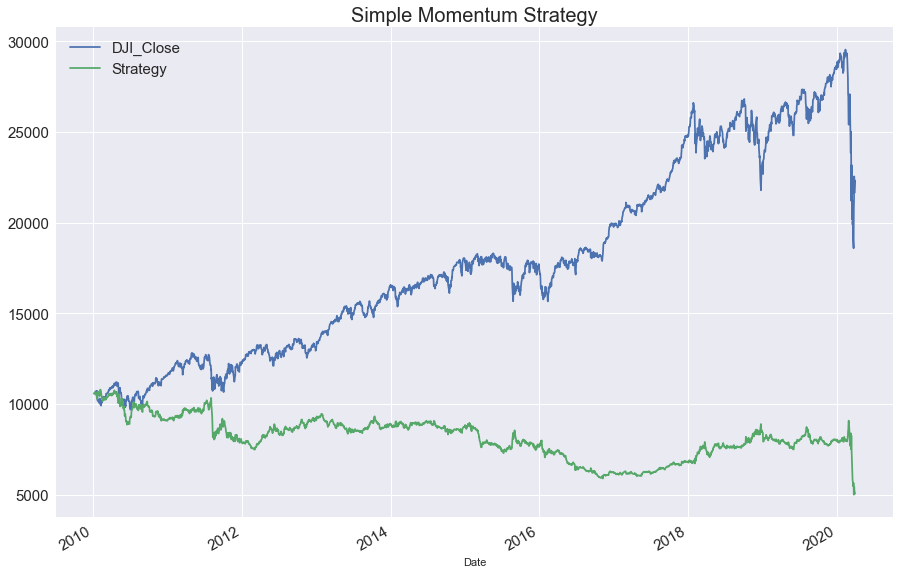

In [176]:
# Display data 
#Select the prices from the DOW JONES stragtegy and Strategy

df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [177]:
#Create Function to calculate return and risk / 252 trading days in a year 
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [178]:
#Pass in the two columns to the function
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,-0.057966,0.167946


__Conclusion__ 

- From an emulized basses we have a return of - 5%  
- DOW JONES return 0.07% per year

Key Finding 

- Our momentum strategy underperforms the basic buy and hold strategy. Not a beneficial long term strategy.   

# Backtesting a simple Contrarian Strategy
__Buy and Hold__(Basic Strategy): Initially Investing into the DJI and do nothing(Position: +1 on all days)


__Simple Contrarian__(Strategy to be tested):
- __Short selling__(-1) DJI tomorrow if today's return was __positive__ 
- __Investing__(+1)into DJI tomorrow if today's return was __negative__ 

In [179]:
#Load in Data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [180]:
#Filter daily Close and Returns 
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [181]:
df["Position"] = -np.sign(df["DJI_Return"])

In [182]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0
2020-03-25,21200.550781,0.023938,-1.0
2020-03-26,22552.169922,0.063754,-1.0


Key Points

- short sell the index with positive position
- Invest if position is negative (-)

In [183]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [184]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650
2020-03-25,21200.550781,0.023938,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,-1.0,-0.063754


In [185]:
#Create the returns of the strategy 
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [186]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650
2020-03-25,21200.550781,0.023938,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,-1.0,-0.063754


In [187]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650,16885.390373
2020-03-25,21200.550781,0.023938,-1.0,-0.023938,16481.182609
2020-03-26,22552.169922,0.063754,-1.0,-0.063754,15430.441894


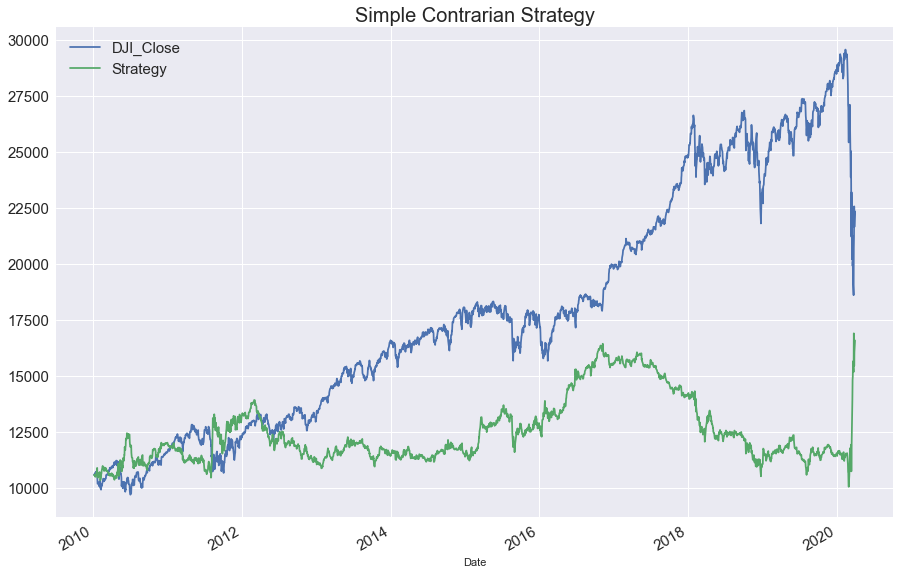

In [188]:
#Visualize data in graph
df[["DJI_Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

Key points

- Our strategy underperforms the passive strategy in the long term
- Some sub-periods where we outperfrom the passive strategy  

In [189]:
#Return and risk summary 
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.057966,0.167946


 - Risk is the same 
 - Our strategy underperforms with 0.057 compared to DJI of 0.087 

# More Complex Strategies & Backtesting vs. Fitting 

- Try to find a stragey that outperforms our buy and hold strategy 

**__Note__: Backtesting is performed on historical data available / Fitting follows the system's logic in a live market

In [190]:
#Load data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [191]:
#Filter from 2010 / Close Prices 
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [192]:
#Use Where to filter data
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)

In [193]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1
2010-01-06,10573.679688,0.000157,1
2010-01-07,10606.860352,0.003138,1
2010-01-08,10618.190430,0.001068,1
2010-01-11,10663.990234,0.004313,1
...,...,...,...
2020-03-24,20704.910156,0.113650,-1
2020-03-25,21200.550781,0.023938,-1
2020-03-26,22552.169922,0.063754,-1


In [194]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [195]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,0.003138
2010-01-08,10618.190430,0.001068,1,0.001068
2010-01-11,10663.990234,0.004313,1,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650
2020-03-25,21200.550781,0.023938,-1,-0.023938
2020-03-26,22552.169922,0.063754,-1,-0.063754


In [196]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [197]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650,55396.555359
2020-03-25,21200.550781,0.023938,-1,-0.023938,54070.455264
2020-03-26,22552.169922,0.063754,-1,-0.063754,50623.249433


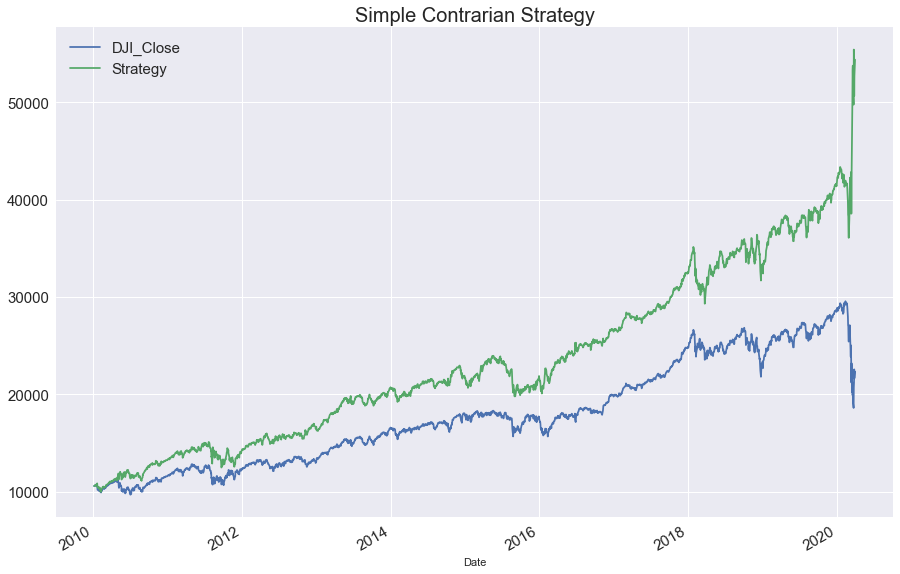

In [198]:
#Visualize data
df[["DJI_Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [199]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.174262,0.167659


Even if a strategy seems to outperform the basic Strategy, the following  issues need to be considered/analyzed as well: 
    
- Backtesting Vs. Fitting -> Was the strategy fitted and optimized on historical data? Forward testing is required

- Transaction Costs -> Chaning __positions trigger cost. Include costs__.

- Tax efffects -> Changing positions can __trigger tax payments. Include tax__.

# Simple Moving Avergaes (Cross Overs)